### a) Download the Combined Cycle Power Plant data

In [1]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from math import sqrt


In [2]:
combined_cycle_power_plant = fetch_ucirepo(id=294) 
  

X = combined_cycle_power_plant.data.features 
y = combined_cycle_power_plant.data.targets 

  

print(combined_cycle_power_plant.variables) 

  name     role        type demographic                          description  \
0   AT  Feature  Continuous        None      in the range 1.81°C and 37.11°C   
1    V  Feature  Continuous        None       in teh range 25.36-81.56 cm Hg   
2   AP  Feature  Continuous        None  in the range 992.89-1033.30 milibar   
3   RH  Feature  Continuous        None       in the range 25.56% to 100.16%   
4   PE   Target  Continuous        None                     420.26-495.76 MW   

     units missing_values  
0        C             no  
1    cm Hg             no  
2  milibar             no  
3        %             no  
4       MW             no  


In [3]:
print(combined_cycle_power_plant.metadata) 


{'uci_id': 294, 'name': 'Combined Cycle Power Plant', 'repository_url': 'https://archive.ics.uci.edu/dataset/294/combined+cycle+power+plant', 'data_url': 'https://archive.ics.uci.edu/static/public/294/data.csv', 'abstract': 'The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the plant was set to work with full load. ', 'area': 'Computer Science', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 9568, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['PE'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2014, 'last_updated': 'Mon Mar 04 2024', 'dataset_doi': '10.24432/C5002N', 'creators': ['Pnar Tfekci', 'Heysem Kaya'], 'intro_paper': {'ID': 406, 'type': 'NATIVE', 'title': 'Prediction of full load electrical power output of a base load operated combined cycle power plant using machine learning methods', 'aut

### (b) Exploring the data:

In [4]:
print(type(combined_cycle_power_plant))

<class 'ucimlrepo.dotdict.dotdict'>


In [5]:
# checking the number of rows and column

df = pd.concat([X, y], axis=1)
print(df.shape)

(9568, 5)


This dataset has 9568 data points collected from a Combined Cycle Power Plant over 6 years. It has 5 columns(4 features and 1 target variable:

1) AT (hourly average ambient variables Temperature) in the range 1.81°C and 37.11°C
   
2) V (Exhaust Vacuum) in teh range 25.36-81.56 cm Hg
   
3) AP (Ambient Pressure) in the range 992.89-1033.30 milibar
   
4) RH (Relative Humidity) in the range 25.56% to 100.16%
   
5) PE (net hourly electrical energy output) in the range of 420.26-495.76 MW

#### Let's make pairwise scatterplots of all the varianbles in the data set including the predictors (independent variables) with the dependent variable.

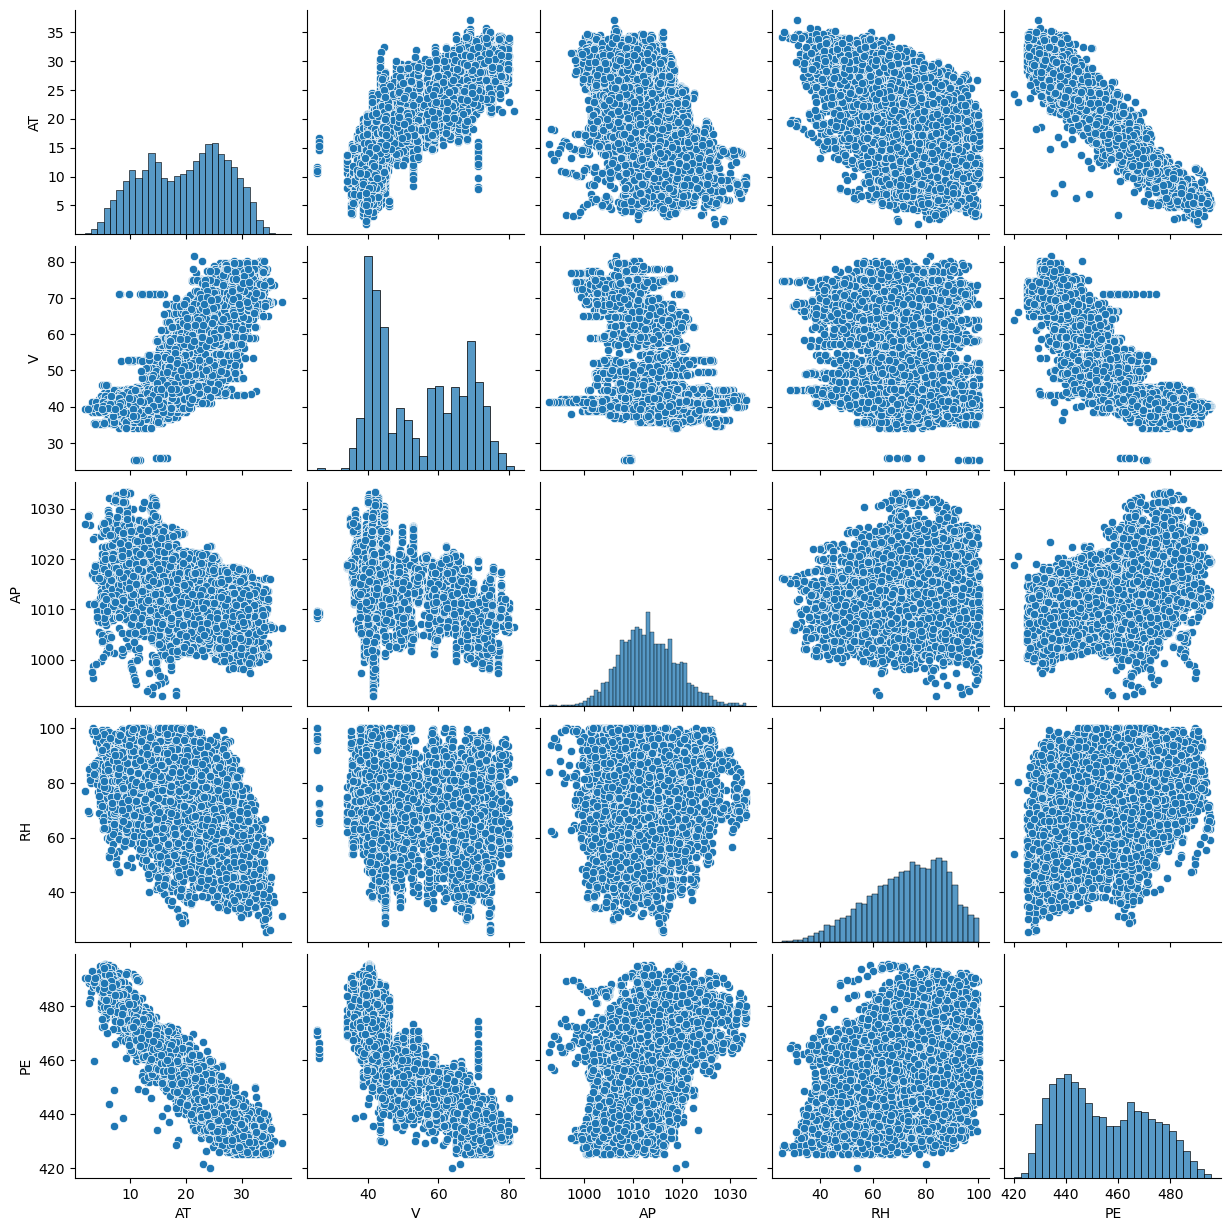

In [6]:
sns.pairplot(df);

The last column/row shows relationship of independent variables with dependent variable "PE". As we can see there is an inverse linear relationship with Temperatureb(AT) and Exhaust Vacuum (V) with the dependent variable PE. However the relation with AP (Ambinent Presssure) seems to be vice versa, (i.e. there is a positive correlation between AP and PE). For the dependent Variable PE the relation with Relative Humidity is not very clear.

In [7]:
#calculating some statistical quantities like mean, median, IQR etc

statistics_table = pd.DataFrame({
    'Mean': df.mean(),
    'Median': df.median(),
    'Range': df.max() - df.min(),
    'First Quartile': df.quantile(0.25),
    'Third Quartile': df.quantile(0.75),
    'IQR': df.quantile(0.75) - df.quantile(0.25)
})
print(statistics_table)

           Mean    Median  Range  First Quartile  Third Quartile      IQR
AT    19.651231    20.345  35.30         13.5100           25.72  12.2100
V     54.305804    52.080  56.20         41.7400           66.54  24.8000
AP  1013.259078  1012.940  40.41       1009.1000         1017.26   8.1600
RH    73.308978    74.975  74.60         63.3275           84.83  21.5025
PE   454.365009   451.550  75.50        439.7500          468.43  28.6800


### c) fitting a simple linear regression model to predict the response.

In [8]:
print(y)



          PE
0     463.26
1     444.37
2     488.56
3     446.48
4     473.90
...      ...
9563  460.03
9564  469.62
9565  429.57
9566  435.74
9567  453.28

[9568 rows x 1 columns]


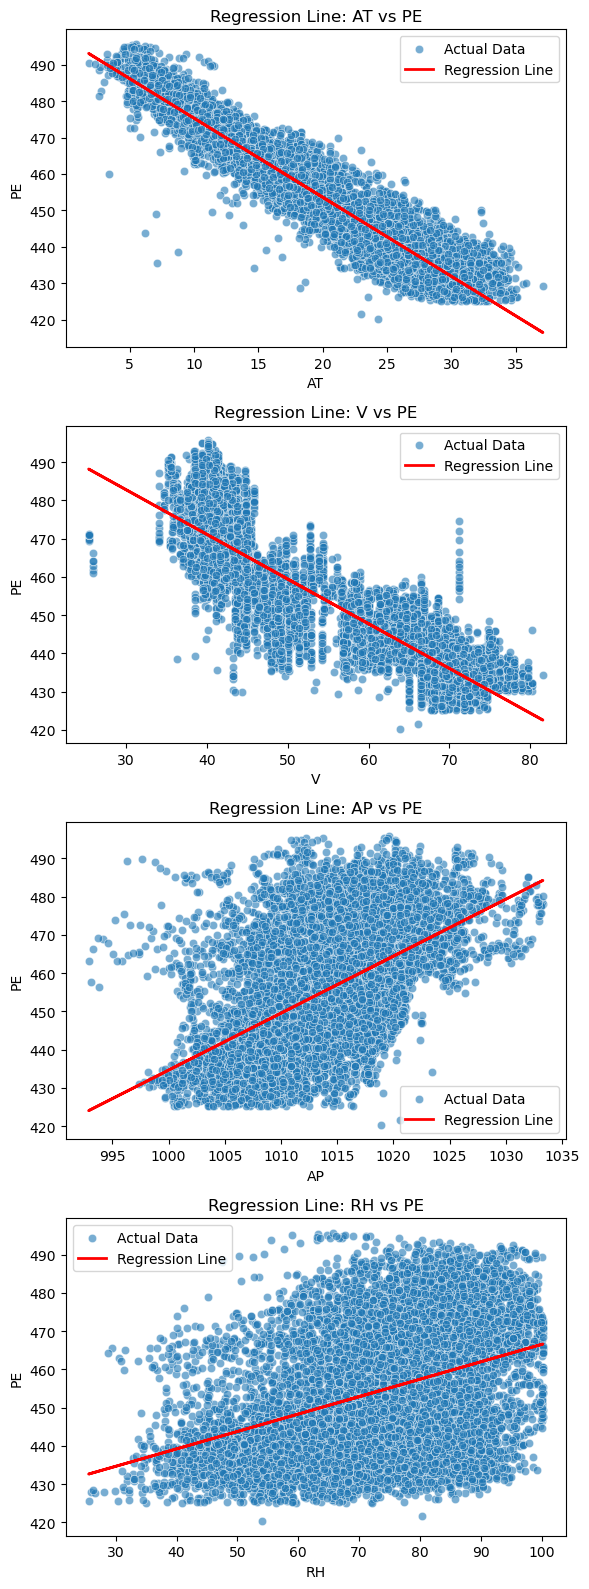

In [9]:
lin_reg_summary_table = []
X_columns = df.columns[:-1]

num_predictors = len(X_columns)
fig, axes = plt.subplots(nrows=num_predictors, ncols=1, figsize=(6, 4 * num_predictors))
y_series = y.iloc[:, 0]

for i, predictor in enumerate(X_columns):
    current_predictor = df[[predictor]]
    model = LinearRegression()
    model.fit(current_predictor, y_series)
    y_pred = model.predict(current_predictor)
    r2 = r2_score(y_series, y_pred)


    lin_reg_summary_table.append( {
        'Predictor': predictor,
        'Intercept': model.intercept_,
        'Slope': model.coef_[0],
        'R² Score': r2
    })
    
    sns.scatterplot(x=df[predictor], y=y_series, ax=axes[i], label="Actual Data", alpha=0.6)
    
    axes[i].plot(df[predictor], y_pred, color='red', linewidth=2, label="Regression Line")


    

    axes[i].set_xlabel(predictor)
    axes[i].set_ylabel("PE")
    axes[i].set_title(f"Regression Line: {predictor} vs PE")
    axes[i].legend()
    

regression_results = pd.DataFrame(lin_reg_summary_table)



plt.tight_layout()
plt.show()

In [10]:
y

,PE
0,463.26
1,444.37
2,488.56
3,446.48
4,473.90
...,...
9563,460.03
9564,469.62
9565,429.57
9566,435.74


In [11]:
print(regression_results)

  Predictor    Intercept     Slope  R² Score
0        AT   497.034120 -2.171320  0.898948
1         V   517.801526 -1.168135  0.756518
2        AP -1055.260989  1.489872  0.268769
3        RH   420.961766  0.455650  0.151939


The regression_results table along with plots proves that there is a negative correlation between dependent variable and vacuum (V) as well as temperature (AT). AP and RH does not have strong linear relationship with energy output (R^2 of 0.27 and 0.15)

We can clearnly see that there are some outliers in our plots, which will need to be removed. We will deal with outleirs only for Temperature and Vacuum which have strong linera relationship with outcome variable of energy output.

### d) Now let's fit a multiple regression model to predict the response using all of the predictors.

In [12]:
mult_regr = linear_model.LinearRegression()
mult_regr.fit(X, y)

y_pred = mult_regr.predict(X)

In [13]:

X_with_const = sm.add_constant(X)

model = sm.OLS(y, X_with_const).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Mon, 17 Feb 2025   Prob (F-statistic):               0.00
Time:                        23:43:13   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

We have pretty high R squared (~93%), which means that bigger proportion of variance is actually explained by the model. 
As all the predictors have p-value < 0.05, they all are statistically significant and we can reject H0 for all of them. Temperature has the highest impact with negative coefficient. 

Results are almost the same with simple liear regression model, because the correlation with highest impact on dependent variable is still with feature Temparate (AT). correlation with Temperature and exhaust vacuum are negative as confirmed above. The coefficients for AP and RH are close to 0, but they have very small p value, which means that they are still statistically significant, but they do not have high impact on the output variable compared to other features. 

According to simple linear regression, the relation of relative humiditiy (RH) and target energy output is positive, while the multiple regression model proves the opposite. But it is clear that the relation is not linear from the pairplots. 

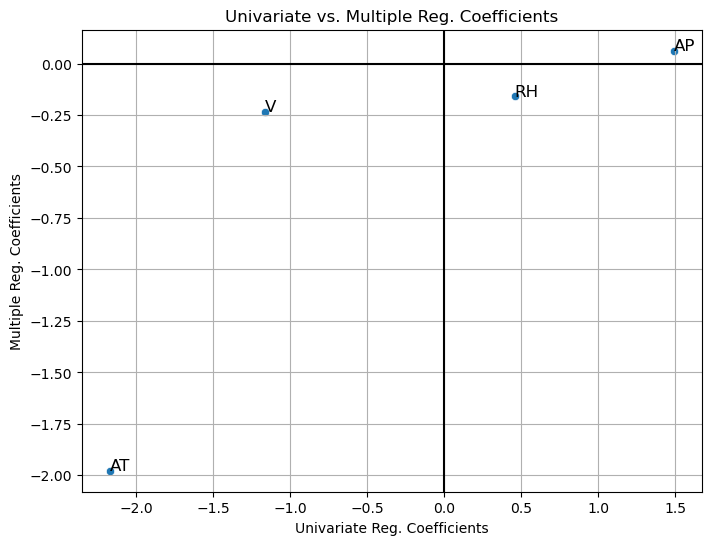

In [14]:

univariate_coefs = {}
for col in X.columns:
    X_uni = sm.add_constant(X[col])  
    model_uni = sm.OLS(y, X_uni).fit()
    univariate_coefs[col] = model_uni.params[col]


univariate_coefs = pd.Series(univariate_coefs, name="Univariate Coefficients")


X_with_const = sm.add_constant(X)
model_multi = sm.OLS(y, X_with_const).fit()


multiple_coefs = model_multi.params.drop('const')  # Drop intercept


coef_df = pd.DataFrame({'Univariate': univariate_coefs, 'Multiple': multiple_coefs})


plt.figure(figsize=(8,6))
sns.scatterplot(x=coef_df['Univariate'], y=coef_df['Multiple'], marker='o')


for predictor, (x, y) in coef_df.iterrows():
    plt.text(x, y, predictor, fontsize=12)


plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.xlabel("Univariate Reg. Coefficients")
plt.ylabel("Multiple Reg. Coefficients")
plt.title("Univariate vs. Multiple Reg. Coefficients")
plt.grid(True)


plt.show()


In this plot if the point is on the diagonal, it means that predictor's effect remains the same in both methods (univariate and multiple regression). However, according to our plot, Temperature, Humidity and ambient pressure as predictors does not change much after switching to multiple regression analysis, while the Vacuum predictor's effect on dependent variable changed mostly, having greater effect in univariate regression vs mild effect in multiple regression analysis. 

In [15]:
y = combined_cycle_power_plant.data.targets 
print(y)

          PE
0     463.26
1     444.37
2     488.56
3     446.48
4     473.90
...      ...
9563  460.03
9564  469.62
9565  429.57
9566  435.74
9567  453.28

[9568 rows x 1 columns]


### Checking if there is a nonlinear association between any of the predictors and the response

In [16]:
nonlinear_results = {}
y = y.iloc[:, 0]
for predictor in X.columns:
    X_polynomial = pd.DataFrame()
    X_polynomial['X'] = X[predictor]
    X_polynomial['X^2'] = X[predictor] ** 2
    X_polynomial['X^3'] = X[predictor] ** 3
    
    X_polynomial = sm.add_constant(X_polynomial) 

    
    polynomial_model = sm.OLS(y, X_polynomial).fit()
    
    
    nonlinear_results[predictor] = polynomial_model.pvalues[['X^2', 'X^3']]


nonlinear_results_df = pd.DataFrame(nonlinear_results).T
nonlinear_results_df.columns = ['P-value for X^2', 'P-value for X^3']
print(nonlinear_results_df)


    P-value for X^2  P-value for X^3
AT     8.833045e-73    3.652185e-110
V      7.684969e-01     1.373489e-02
AP     3.666705e-17     8.264146e-18
RH     9.395430e-06     1.440279e-05


So for any p value if p-value < 0.05, it means that there is an evidence of nonlinearity (we reject 𝐻0, meaning the relationship is nonlinear).
If p-value > 0.05, it means no strong evidence of nonlinearity (fail to reject 𝐻0). So the table above proves that there is very small p for Temperature, Pressure and relative humidity in terms of X^2 and X^3, which means that we reject H0, so the relationship is nonlinear. While the p value for Vacuum for X^2 and X^3, p value is greater than 0.05, so we fail to reject the null, which means that there is no strong evidence of nonlinearity of dependent ariable and Vacuum. 

#### g) Checking whether there is an evidence of association of interactions of predictors with the response. To answer this question, let's run a full linear regression model with all pairwise interaction terms and state whether any interaction terms are statistically significant.

In [17]:
print(X.columns)

Index(['AT', 'V', 'AP', 'RH'], dtype='object')


In [18]:
from itertools import combinations


interaction_terms = pd.DataFrame()

columns = X.columns

for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        col_name = f"{columns[i]}_{columns[j]}"  
        interaction_terms[col_name] = X[columns[i]] * X[columns[j]]

X_interactions = pd.concat([X, interaction_terms], axis=1)
X_interactions = sm.add_constant(X_interactions) 


model_interactions = sm.OLS(y, X_interactions).fit()


interaction_pvalues = model_interactions.pvalues.drop(['const'] + list(X.columns))


interaction_results_df = pd.DataFrame({
    "Interaction Term": interaction_pvalues.index,
    "P-value": interaction_pvalues.values
})
interaction_results_df=interaction_results_df.sort_values(by = "P-value")
print(interaction_results_df)



  Interaction Term        P-value
0             AT_V  3.333358e-117
2            AT_RH   1.216944e-10
3             V_AP   2.877026e-07
5            AP_RH   3.360557e-02
4             V_RH   8.619366e-02
1            AT_AP   4.520509e-01


In total, we have 6 pairs to test the association of interactions with the response.
P-Values of pairwise interaction terms show that pairs Temperature (AT) and Vacuum (V) together are the most statistically significant, showing an interaction effect between them. 
Interaction effect is clear also between AT and RH, V and AP, AP and RH. While the interactions of predictions of V and RH and AT and AP are not statistically significant as they have greater than 0.05 p value, showing no strong evidence of interaation. 

### As there is a chance to improve our model using possible interaction terms or nonlinear associations between the predictors and response. Let's Train the regression model on a randomly selected 70% subset of the data with all predictors and run a regression model involving all possible interaction terms and quadratic nonlinearities, and remove insignificant variables using p-values. 

In [19]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

#lets first create a Baseline model
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

baseline_model = sm.OLS(y_train, X_train_const).fit()

y_train_pred_baseline = baseline_model.predict(X_train_const)
y_test_pred_baseline = baseline_model.predict(X_test_const)


train_mse_baseline = mean_squared_error(y_train, y_train_pred_baseline)
test_mse_baseline = mean_squared_error(y_test, y_test_pred_baseline)






In [20]:
#then lets create a Model with interactions and quadratic Terms


interaction_terms_train = pd.DataFrame()
interaction_terms_test = pd.DataFrame()
quadratic_terms_train = pd.DataFrame()
quadratic_terms_test = pd.DataFrame()




columns = X_train.columns
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):  
        col1, col2 = columns[i], columns[j]
        interaction_terms_train[f"{col1}*{col2}"] = X_train[col1] * X_train[col2]
        interaction_terms_test[f"{col1}*{col2}"] = X_test[col1] * X_test[col2]


for col in X_train.columns:
    quadratic_terms_train[f"{col}^2"] = X_train[col] ** 2
    quadratic_terms_test[f"{col}^2"] = X_test[col] ** 2


X_train_adv = pd.concat([X_train, interaction_terms_train, quadratic_terms_train], axis=1)
X_test_adv = pd.concat([X_test, interaction_terms_test, quadratic_terms_test], axis=1)
X_train_adv = sm.add_constant(X_train_adv)
X_test_adv = sm.add_constant(X_test_adv)


advanced_model = sm.OLS(y_train, X_train_adv).fit()


In [21]:
#now lets remove insignificant variables that have less than 0.05 p value

significant_vars = advanced_model.pvalues[advanced_model.pvalues < 0.05].index
X_train_adv_significant = X_train_adv[significant_vars]
X_test_adv_significant = X_test_adv[significant_vars]




In [22]:
#lets check which variables were removed because of their p value

all_advanced_vars = set(X_train_adv.columns)
significant_vars_set = set(significant_vars)

removed_insignificant_vars = all_advanced_vars - significant_vars_set

removed_vars_df = pd.DataFrame({"Removed Insignificant Variables": list(removed_insignificant_vars)})

print(removed_vars_df)

  Removed Insignificant Variables
0                           AT*AP
1                             V^2
2                            V*AP
3                            V*RH


In [23]:
significant_vars_df = pd.DataFrame({"significant Variables": list(significant_vars_set)})
print(significant_vars_df)

   significant Variables
0                     RH
1                      V
2                  const
3                   AT^2
4                     AP
5                   AP^2
6                   AT*V
7                     AT
8                  AT*RH
9                   RH^2
10                 AP*RH


In [24]:
# now let's refit the model
final_model = sm.OLS(y_train, X_train_adv_significant).fit()


y_train_pred_advanced = final_model.predict(X_train_adv_significant)
y_test_pred_advanced = final_model.predict(X_test_adv_significant)

In [25]:
train_mse_advanced = mean_squared_error(y_train, y_train_pred_advanced)
test_mse_advanced = mean_squared_error(y_test, y_test_pred_advanced)


mse_results = pd.DataFrame({
    "Model": ["Baseline Linear Regression", "Advanced Regression with Interactions & Quadratics"],
    "Train MSE": [train_mse_baseline, train_mse_advanced],
    "Test MSE": [test_mse_baseline, test_mse_advanced]
})

print(mse_results)

                                               Model  Train MSE   Test MSE
0                         Baseline Linear Regression  20.422763  21.605882
1  Advanced Regression with Interactions & Quadra...  17.880859  18.789124


To ensure proper baseline effect and preserve interpretability, it is recommended to keep the feature in the model if its interaction terms are there. So after calculating train and test MSE of advanced model, lets bring back feature Vacuum (V), although it had more than 0.05 p value. Since the interaction of V * AT is part of our advanced model. Let's see if the MSE changes drastically or not. 

In [26]:
#let's add the feature "V" back
significant_vars_set.add('V')


X_train_adv_significant = X_train_adv[list(significant_vars_set)]
X_test_adv_significant = X_test_adv[list(significant_vars_set)]


final_model_with_V = sm.OLS(y_train, X_train_adv_significant).fit()


y_train_pred_final = final_model_with_V.predict(X_train_adv_significant)
y_test_pred_final = final_model_with_V.predict(X_test_adv_significant)


train_mse_final = mean_squared_error(y_train, y_train_pred_final)
test_mse_final = mean_squared_error(y_test, y_test_pred_final)


updated_mse_results = pd.DataFrame({
    "Model": ["Final Model (with 'V' added back)"],
    "Train MSE": [train_mse_final],
    "Test MSE": [test_mse_final]
})

print(updated_mse_results)


                               Model  Train MSE   Test MSE
0  Final Model (with 'V' added back)  17.880859  18.789124


We see that our model with Vacuum feature (V) provides better results for MSE, although we saw that p value for feature V was more than 0.05. Let's leave it in the model for the above mentioned reasons. So our final Test MSE would be ~ 18.8 compared to baseline model of ~ 21.6

### Now let's compare with k-nearest neighbor regression for this dataset using both normalized and raw features by finding the value of k in 1; 2; : : : ; 100.

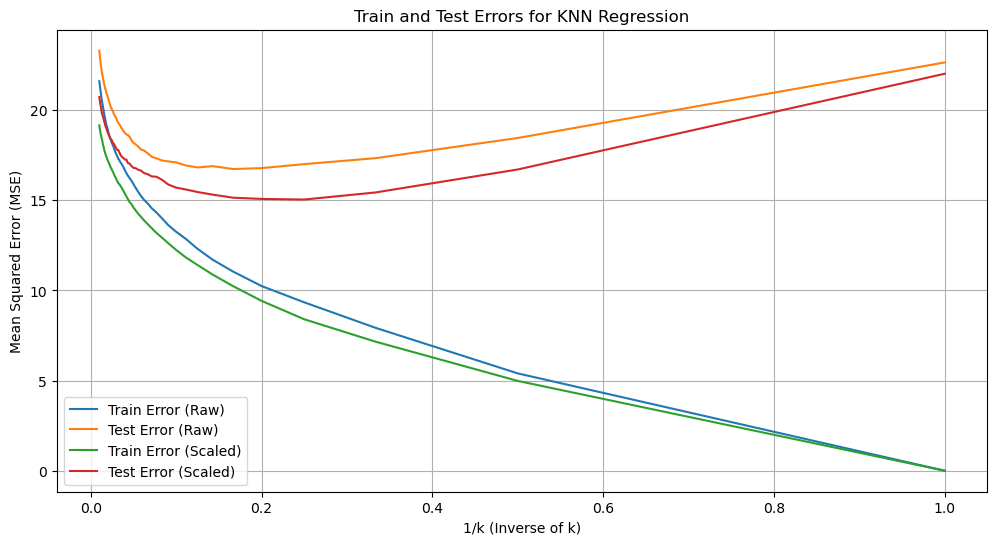

  Feature Type  Best k  Best Test MSE
0          Raw       6      16.739066
1       Scaled       4      15.045766


In [27]:
k_values = range(1, 101)


train_errors_raw = []
test_errors_raw = []
train_errors_scaled = []
test_errors_scaled = []


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


for k in k_values:
    knn_raw = KNeighborsRegressor(n_neighbors=k)
    knn_scaled = KNeighborsRegressor(n_neighbors=k)

    
    knn_raw.fit(X_train, y_train)
    knn_scaled.fit(X_train_scaled, y_train)

    
    y_train_pred_raw = knn_raw.predict(X_train)
    y_test_pred_raw = knn_raw.predict(X_test)

    y_train_pred_scaled = knn_scaled.predict(X_train_scaled)
    y_test_pred_scaled = knn_scaled.predict(X_test_scaled)

    
    train_errors_raw.append(mean_squared_error(y_train, y_train_pred_raw))
    test_errors_raw.append(mean_squared_error(y_test, y_test_pred_raw))

    train_errors_scaled.append(mean_squared_error(y_train, y_train_pred_scaled))
    test_errors_scaled.append(mean_squared_error(y_test, y_test_pred_scaled))


best_k_raw = k_values[np.argmin(test_errors_raw)]
best_k_scaled = k_values[np.argmin(test_errors_scaled)]


plt.figure(figsize=(12, 6))

plt.plot(1 / np.array(k_values), train_errors_raw, label="Train Error (Raw)")
plt.plot(1 / np.array(k_values), test_errors_raw, label="Test Error (Raw)")
plt.plot(1 / np.array(k_values), train_errors_scaled, label="Train Error (Scaled)")
plt.plot(1 / np.array(k_values), test_errors_scaled, label="Test Error (Scaled)")

plt.xlabel("1/k (Inverse of k)")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Train and Test Errors for KNN Regression")
plt.legend()
plt.grid()
plt.show()


best_k_results = pd.DataFrame({
    "Feature Type": ["Raw", "Scaled"],
    "Best k": [best_k_raw, best_k_scaled],
    "Best Test MSE": [min(test_errors_raw), min(test_errors_scaled)]
})

print(best_k_results)


### As we have both models now we can compare the results of KNN Regression with the linear regression model that has the smallest test error.

The K-NN Regression outperforms Linear Regression even for the scaled Regression with Interactions & Quadratics (~15 for scaled and ~16.7 for Raw versus ~18.8).
So the kNN regression with scaled/normalized features and k = 4 is the best performer for this analysis with the least Test MSE